# Spam Filtering Project

This Jupyter Notebook performs spam filtering using various classification algorithms. The project includes data preprocessing, exploratory data analysis (EDA), and model evaluation.

## 1. Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 2. Loading the Dataset

In [2]:
data = pd.read_csv('spam.csv', usecols = [0,1],encoding = 'latin')

In [3]:
data.rename({'v1': 'label', 'v2': 'message'}, axis = 1,inplace = True)

In [4]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Checking for Missing Values

In [ ]:
data.isna().sum()

label      0
message    0
dtype: int64

In [6]:
corpus = data['message'].values

In [7]:
corpus

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

# 4. Preprocessing the Text
Initial Preprocessing

In [8]:
def process_string(corpus):
    i = 0
    while (i < len(corpus)):
        msg = corpus[i]
        corpus[i] = msg.lower()
        i += 1 
    return " ".join(corpus)

In [9]:
string = process_string(corpus)

# Word Frequency Analysis

In [10]:
words = pd.Series(string.split())

In [11]:
words

0             go
1          until
2         jurong
3         point,
4        crazy..
          ...   
86330        its
86331       true
86332         to
86333        its
86334       name
Length: 86335, dtype: object

In [12]:
words.value_counts()

to               2226
i                2208
you              1917
a                1419
the              1317
                 ... 
0871212025016       1
stream              1
cos...              1
polyc               1
rofl.               1
Name: count, Length: 13496, dtype: int64

# Visualizing Top Words

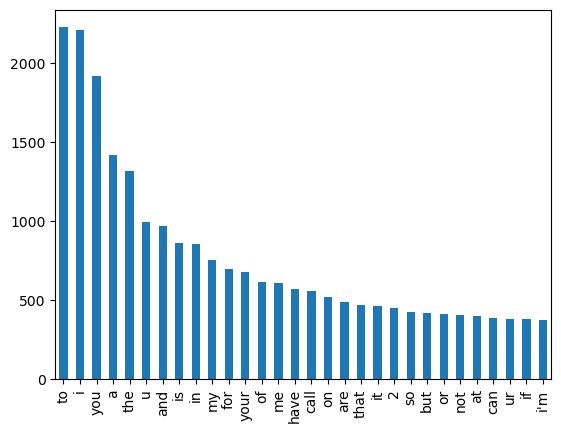

In [13]:
words.value_counts()[:30].plot(kind = "bar")
plt.show()

# 5. Removing Stopwords

In [14]:
from nltk.corpus import stopwords

In [15]:
stopwords = stopwords.words('english')

In [16]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Updated Preprocessing with Stopwords Removal

In [17]:
def process_string(corpus,stopwords = []):
    i = 0
    while (i < len(corpus)):
        msg = corpus[i].lower()
        sentance = []
        for word in msg.split():
            if word not in stopwords:
                sentance.append(word)
        msg = " ".join(sentance)
        corpus[i] = msg
        i += 1 
    return " ".join(corpus)

In [18]:
info = process_string(corpus)

In [19]:
info

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s u dun say so early hor... u c already then say... nah i don\'t think he goes to usf, he lives around here though freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv even my brother is not like to speak with me. they treat me like aids patent. as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press *9 to copy your friends callertune winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more?

# Re-plotting Top Words

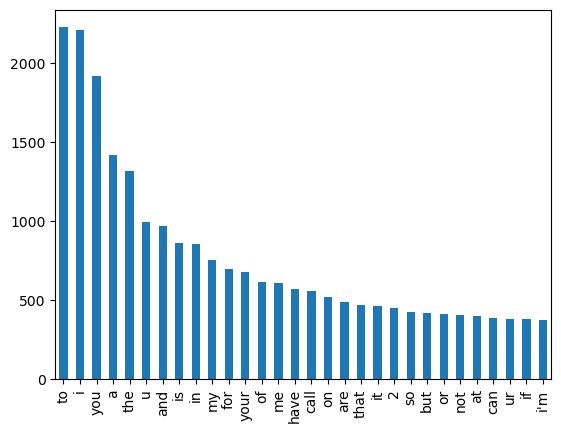

In [20]:
pd.Series(info.split()).value_counts()[:30].plot(kind = "bar")
plt.show()

# 6. Cleaning Data Further by Removing Punctuation

In [21]:
import string


In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
stopwords += ['u','2','ur',"i'm",'4','...','ok',"i'll"] + list(string.punctuation)

In [24]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

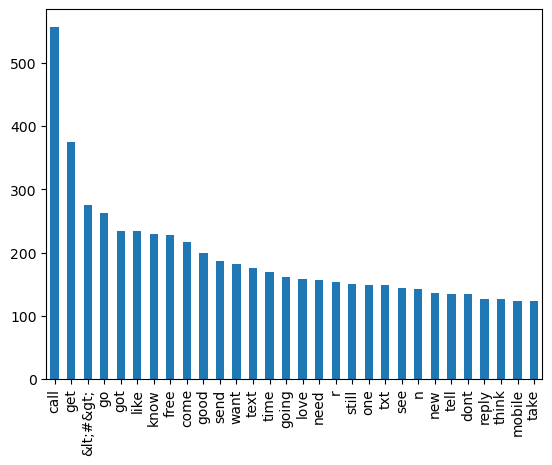

In [25]:
info = process_string(corpus,stopwords)
pd.Series(info.split()).value_counts()[:30].plot(kind = "bar")
plt.show()

# Regex-based Message Processing

In [26]:
import re

In [27]:
def process_string(msg):
    msg = msg.lower()
    sentance = []
    for word in msg.split():
        if word not in stopwords:
            sentance.append(word)
        msg = " ".join(sentance)
        msg = re.sub(r"[!\"#$%&\'()*+,-.:;<=>?@[\\\]^_`{|}~]","",msg)
    return msg

In [28]:
data['message'] = data['message'].apply(process_string)

In [29]:
data.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though


# 7. Exploratory Data Analysis (EDA)

In [30]:
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']

# Display Sample Messages

In [31]:
ham.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though
6,ham,even brother like speak me treat like aids patent


In [32]:
spam.head()

,label,message
2,spam,free entry wkly comp win fa cup final tkts 21s...
5,spam,freemsg hey darling 3 weeks word back id like ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile 11 months more r entitled update latest...
11,spam,six chances win cash 100 20000 pounds txt csh1...


In [33]:
ham_string = pd.Series([word for value in ham['message'].values for word in value.split()])
spam_string = pd.Series([word for value in spam['message'].values for word in value.split()])

In [34]:
plt.rcParams['xtick.labelsize'] = 5 

# Visualize Word Frequency for Ham and Spam

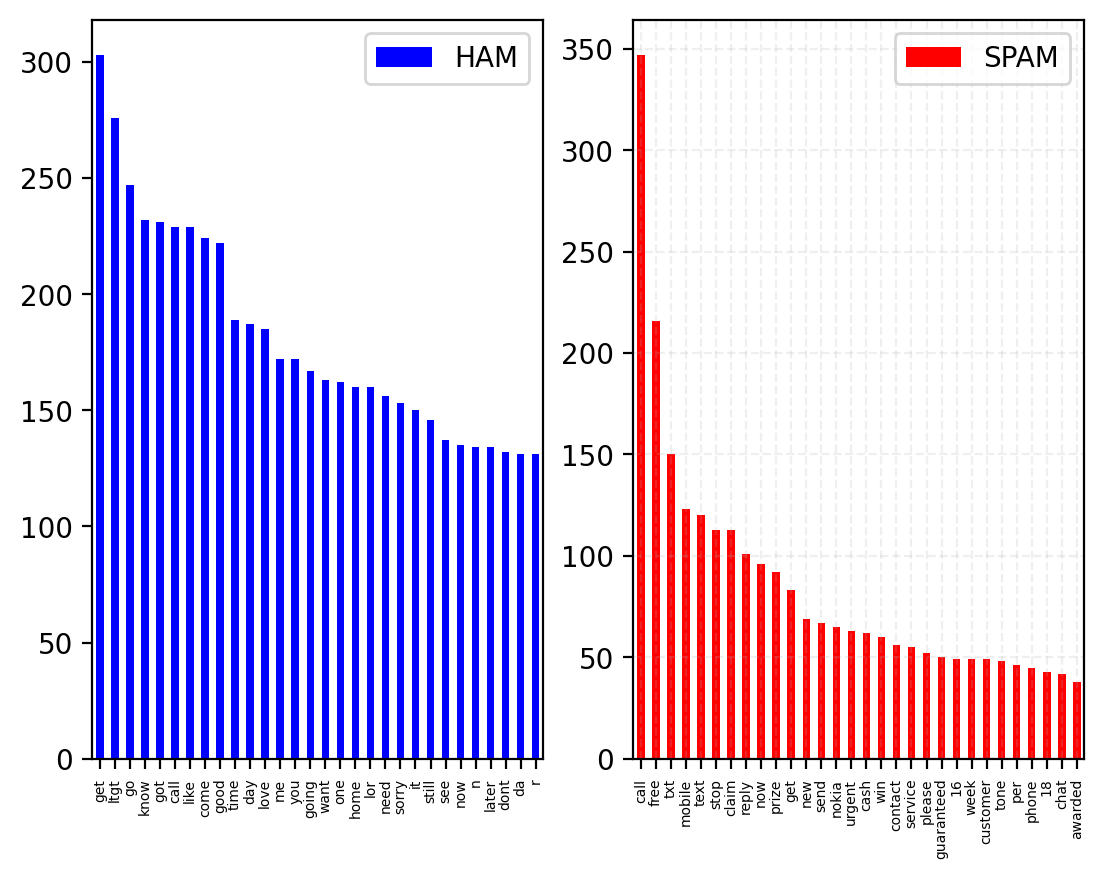

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2, dpi = 200)
ham_string.value_counts()[:30].plot(kind = 'bar', ax = ax1, label = "HAM", color = "blue")
spam_string.value_counts()[:30].plot(kind = 'bar', ax = ax2, label = "SPAM", color = "red")
ax1.legend()
ax2.legend()
plt.grid(ls = "--", alpha = 0.2)
plt.show()

# Average Message Length Comparison

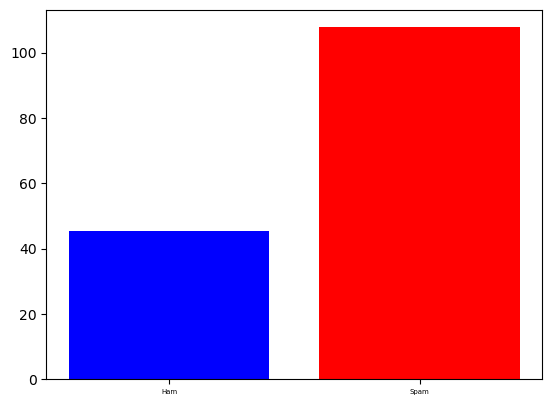

In [36]:
ln1 = np.mean([len(msg) for msg in ham['message'].values])
ln2 = np.mean([len(msg) for msg in spam['message'].values])
plt.bar(["Ham", "Spam"], [ln1,ln2], color = ['blue','red'])
plt.show()

# Word Clouds for Ham and Spam

In [37]:
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 600)

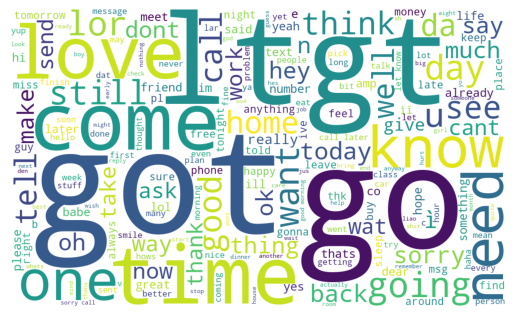

In [38]:
wc = word_cloud.generate_from_text(" ".join(ham_string.values))
plt.imshow(wc)
plt.axis('off')
plt.show()

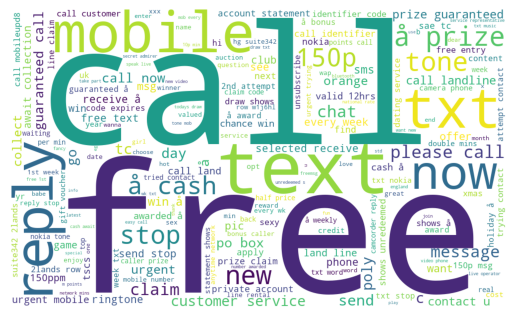

In [39]:
wc = word_cloud.generate_from_text(" ".join(spam_string.values))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 8. Model Building and Evaluation
Importing Required Libraries

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Preparation

In [41]:
X = data['message']

In [42]:
X.head()

0    go jurong point crazy available bugis n great ...
1                                   lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: message, dtype: object

In [43]:
Y = data['label']

In [44]:
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [45]:
y = Y.ravel()

In [46]:
print(y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [47]:
label_encoder = LabelEncoder()

In [48]:
y_encoded = label_encoder.fit_transform(y)

In [49]:
print(y_encoded)

[0 0 1 ... 0 0 0]


In [50]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


In [51]:
X_tr = X.toarray()

In [52]:
X_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Sampling Model

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_encoded, test_size=0.3, random_state=42)


# Model Evaluation Function

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)



In [69]:
def generate_models_report(models,X_train_tr,Y_train,X_test_tr,Y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name","Train Error","Test Error","Train Accuracy","Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr,Y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(Y_train,y_hat_train)
        test_error = rmse(Y_test,y_hat_test)
        train_accuracy = r2_score(Y_train,y_hat_train)
        test_accuracy = r2_score(Y_test,y_hat_test)
        model_name = str(model)
        print(row.format(model_name,train_error,test_error,train_accuracy*100,test_accuracy*100))
        print("_"*width)

# Running Model Comparison

In [70]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    MultinomialNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier()
]

In [71]:
generate_models_report(models, X_train,y_train, X_test,y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|     LogisticRegression()     |        0.06        |        0.14        |       96.71        |       81.61        |
____________________________________________________________________________________________________________________
|   RandomForestClassifier()   |        0.00        |        0.16        |       100.00       |       77.41        |
____________________________________________________________________________________________________________________
|            SVC()             |        0.06        |        0.17        |       96.50        |       75.30        |
________________________________________________________________

# 9. Model Testing
# Logistic Regression Testing

In [77]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_train_pred = model.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Training Confusion Matrix:')
print(train_conf_matrix)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy = (round(train_accuracy,2)*100)
print(f'Training Accuracy: {train_accuracy:.2f}%')

Training Confusion Matrix:
[[3372    0]
 [  15  513]]
Training Accuracy: 100.00%


In [79]:
y_test_pred = model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Test Confusion Matrix:')
print(test_conf_matrix)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy = (round(test_accuracy,2)*100)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Confusion Matrix:
[[1452    1]
 [  34  185]]
Test Accuracy: 98.00%


# Multinomial Naive Bayes Testing

In [80]:
model1 = MultinomialNB()  
model1.fit(X_train, y_train)

MultinomialNB()

In [81]:
y_train_pred = model1.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print('Training Confusion Matrix:')
print(train_conf_matrix)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy = (round(train_accuracy,2)*100)
print(f'Training Accuracy: {train_accuracy:.2f}%')

Training Confusion Matrix:
[[3365    7]
 [  13  515]]
Training Accuracy: 99.00%


In [82]:
y_test_pred = model1.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Test Confusion Matrix:')
print(test_conf_matrix)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy = (round(test_accuracy,2)*100)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Confusion Matrix:
[[1435   18]
 [  17  202]]
Test Accuracy: 98.00%


# 10. Predicting New Messages

In [88]:
new_message = ["Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize."]
new_message_transformed = vectorizer.transform(new_message)

prediction = model1.predict(new_message_transformed)
if prediction[0] == 1:
    print("The message is SPAM.")
else:
    print("The message is NOT SPAM.")


The message is SPAM.
